# DATA WRANGLING: CRIME RATES IN NYC

## Import packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
sns.set_style("darkgrid")
sns.set(style="darkgrid", color_codes=True)
df = pd.read_csv('./data/final_NYC_crimes.csv')

In [2]:
df.head()

,CMPLNT_NUM,DISTRICT,BOROUGH,DATE,TIME,OFFENSE LEVEL,LOC_OF_OCCUR_DESC,OFFENSE_NAME,SUSP_AGE_GROUP,SUSP_RACE,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,YEAR,MONTH,DAY
0,900735981,105,QUEENS,2019-01-01,15:00:00,VIOLATION,FRONT OF,HARRASSMENT,NaN,NaN,...,ASIAN / PACIFIC ISLANDER,F,1056264,205572,40.730639,-73.740167,"(40.730639403000055, -73.74016656399994)",2019,1,1
1,495588128,44,BRONX,2019-01-01,18:35:00,FELONY,NaN,OFFENSES_AGAINST_PUBLIC_ORDER,NaN,NaN,...,UNKNOWN,E,1004749,240880,40.827820,-73.925931,"(40.827819901000055, -73.92593075599996)",2019,1,1
2,876271073,88,BROOKLYN,2019-01-01,1:00:00,FELONY,INSIDE,LARCENY,NaN,NaN,...,WHITE,F,990026,189746,40.687492,-73.979174,"(40.687492038000066, -73.97917448199998)",2019,1,1
3,394629573,44,BRONX,2019-01-01,15:15:00,FELONY,NaN,OFFENSES_AGAINST_PUBLIC_ORDER,25-44,WHITE HISPANIC,...,UNKNOWN,E,1004749,240880,40.827820,-73.925931,"(40.827819901000055, -73.92593075599996)",2019,1,1
4,579035297,18,MANHATTAN,2019-01-01,2:10:00,FELONY,INSIDE,ASSAULT,UNKNOWN,BLACK,...,WHITE HISPANIC,M,987374,217550,40.763809,-73.988724,"(40.763808604000076, -73.98872409799998)",2019,1,1


### Convert Dates to DateTime format

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])

# DATA STORYTELLING: CRIME RATES IN NYC

The purpose of this project is to be able to understand the nature of crimes that happen in NYC in each borough. Various crimes could be confined to different boroughs. 

I performed some data exploration and visualization in this notebook with the hope of uncovering some interesting insights along the way. I used publicly available data to explore crime in NYC from January 2019 to December 2019. The data is available from the NYC's data portal linked below.

https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243/data

Though the original audience is the NYPD cops and detectives, the audience could be any New York City's resident with minimum knowledge of the technicalities of the code cells. There are comment in each cell codes to explain what steps I took to obtain the results.

## Display amount of Crimes per borough in the data set

BROOKLYN         129370
MANHATTAN        113650
BRONX             99002
QUEENS            90147
STATEN ISLAND     18510
UNKNOWN             299
Name: BOROUGH, dtype: int64

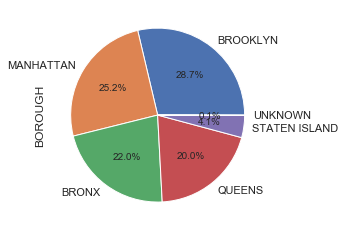

In [4]:
borough_count = df.BOROUGH.value_counts()
borough_count.plot(kind='pie', y = 'BOROUGH', shadow=False,autopct='%1.1f%%', legend = False)
borough_count

We counted the ratio of crimes in each borough to the total crimes reported and did a pie plot. Brooklyn had the highest reported crimes but it was not too far of a difference from Manhattan, Bronx and Queens.

## Plot frequency of crimes for each borough in 2019
I want to see the trend of crimes reported every month in each borough. Is there peak season for crimes? When is the crime reported lowest? To see the bigger picture, I made time series plot for all the boroughs in each month.

In [5]:
# create subset df
boro_2019 = df[['MONTH', 'BOROUGH']]
boro_2019 = boro_2019[boro_2019.BOROUGH != 'UNKNOWN']
boro_2019

,MONTH,BOROUGH
0,1,QUEENS
1,1,BRONX
2,1,BROOKLYN
3,1,BRONX
4,1,MANHATTAN
...,...,...
450973,12,BROOKLYN
450974,12,BRONX
450975,12,BROOKLYN
450976,12,STATEN ISLAND


### Plot the frequency of crimes reported in all boroughs in one graph.

In [6]:
# use unstack() to create the dataframe of crimes for each borough per month
#Grouping
month_boro = boro_2019.groupby(['MONTH','BOROUGH'])
crimes_per_borough = month_boro["MONTH"].count().unstack()
crimes_per_borough

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
MONTH,,,,,
1,7874,10600,8823,7016,1506
2,6956,9160,7889,6387,1355
3,7987,10500,8996,7308,1477
4,7979,10436,9228,7086,1499
5,8817,11516,9953,8046,1674
6,8477,11383,10163,7991,1665
7,9331,12108,10392,8461,1721
8,9017,11566,10292,8191,1548
9,8694,11499,10198,7767,1691


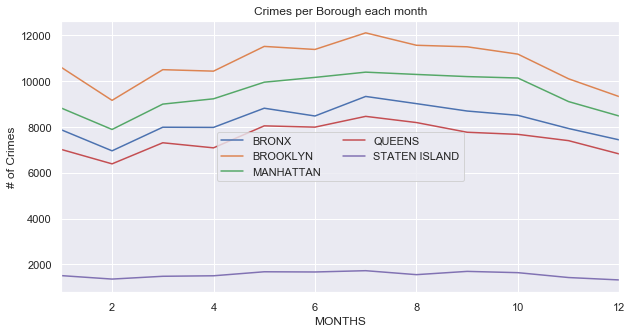

In [7]:
# Plot the df
fig, ax = plt.subplots(figsize=(10,5))
crimes_per_borough.plot(ax=ax, title="Crimes per Borough each month", legend=False)
ax.set(xlabel="MONTHS", ylabel="# of Crimes")

# Customize Legend
ax.legend(loc='center', frameon=True, ncol=2)

The trends of crimes reported are similar and consistent throughout the year for each borough. Brooklyn has been consistently on top. For more details, I made the time series plots of each borough.

### Plot time series of Bronx in 2019

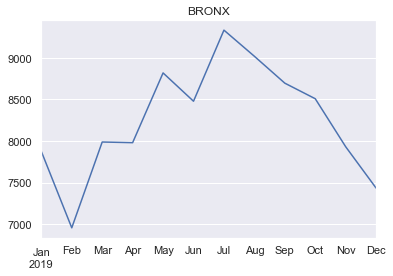

In [8]:
#create subset df with only 2 columns
boro_2019 = df[['DATE', 'BOROUGH', 'MONTH']]

boro_2019 = boro_2019[boro_2019.BOROUGH != 'UNKNOWN']

#Create the filter
bronx = boro_2019[boro_2019['BOROUGH'] == 'BRONX']

# Count the sum of occurences for each date
bronx = bronx.DATE.value_counts()

# Use resample to organize it into monthly sums
bronx = bronx.resample(rule='M').apply('sum')

# Plot
bronx.plot(kind='line', title = "BRONX")


### Plot Manhattan in 2019

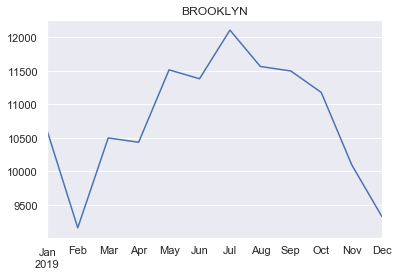

In [9]:
manhattan = boro_2019[boro_2019['BOROUGH'] == 'BROOKLYN']
manhattan = manhattan.DATE.value_counts()
manhattan = manhattan.resample(rule='M').apply('sum')
manhattan.plot(kind='line', title="BROOKLYN")

### Plot Manhattan in 2019

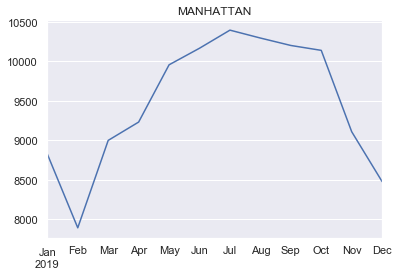

In [10]:
manhattan = boro_2019[boro_2019['BOROUGH'] == 'MANHATTAN']
manhattan = manhattan.DATE.value_counts()
manhattan = manhattan.resample(rule='M').apply('sum')
manhattan.plot(kind='line', title="MANHATTAN")

### Plot Queens in 2019

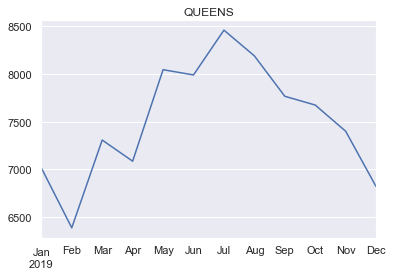

In [11]:
queens = boro_2019[boro_2019['BOROUGH'] == 'QUEENS']
queens = queens.DATE.value_counts()
queens = queens.resample(rule='M').apply('sum')
queens.plot(kind='line', title="QUEENS")

### Plot Staten Island in 2019

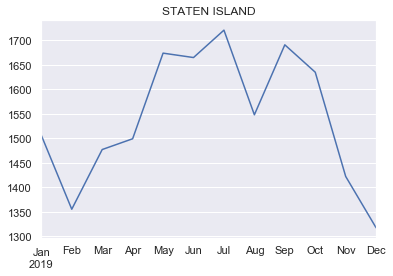

In [12]:
staten_island = boro_2019[boro_2019['BOROUGH'] == 'STATEN ISLAND']
staten_island = staten_island.DATE.value_counts()
staten_island = staten_island.resample(rule='M').apply('sum')
staten_island.plot(kind='line', title="STATEN ISLAND")

All boroughs have a noticeable drop rate in February. Summer seems to be the peak season for crimes, starting in May and the highest and dropping starts in August. The highest crime reported happened in July and lowest are February and December.

## Get the frequency of top 10 districts with most crimes.
NYC is one of the most densely populated cities in the US so no doubt, crimes are reported in all parts of NYC. Now that we have the crime data for each borough, I want to break it down and see the top 10 districts with the most crimes reported.

In [13]:
# TODO: create another column where district and borough are combined in one column
district_borough = df[["DISTRICT", "BOROUGH"]].copy()
district_borough['DISTRICT_BOROUGH'] = df.apply(lambda x: f"{x['DISTRICT']}, {x['BOROUGH']}", axis=1)
district_borough

# Get the top 10 districts with highest frequencies of crimes reported
district_crimes = district_borough.DISTRICT_BOROUGH.value_counts().head(10)

#Sort in descending order
district_crimes = district_crimes.sort_values(ascending=True)
district_crimes

67, BROOKLYN      8593
73, BROOKLYN      9010
43, BRONX         9309
46, BRONX         9393
47, BRONX         9468
14, MANHATTAN     9547
52, BRONX         9710
44, BRONX        11440
40, BRONX        12813
75, BROOKLYN     13936
Name: DISTRICT_BOROUGH, dtype: int64

[Text(0, 0.5, 'District'), Text(0.5, 0, 'Number of Crimes')]

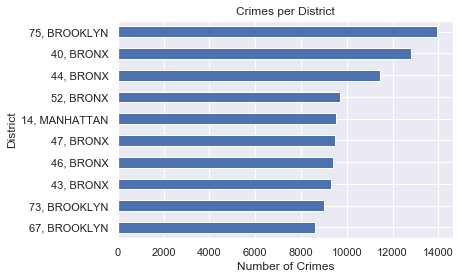

In [14]:
# Plot Crimes per District using horizontal bar chart
ax = district_crimes.plot(kind='barh', title="Crimes per District")
ax.set(xlabel="Number of Crimes", ylabel="District")

// TODO: fix analysis

The top district with most crimes is Disrict 75 in Brooklyn and the following districts are majority from Brooklyn.

## Make a Map of Total Crimes per District in 2019
To visualize the crime data per district, we can use `sns.lmplot` to make the scatter plot of crimes reported per district. Just to clarify, this is not the exact map of NYC. This is a scatter plot based on the exact location of the occurence of the crime reported per X and Y coordinate of the crime data. There might be parts of NYC that is not dotted here since no crime was reported.

Text(0.5, 1, 'ALL CRIMES REPORTED PER DISTRICT 2019')

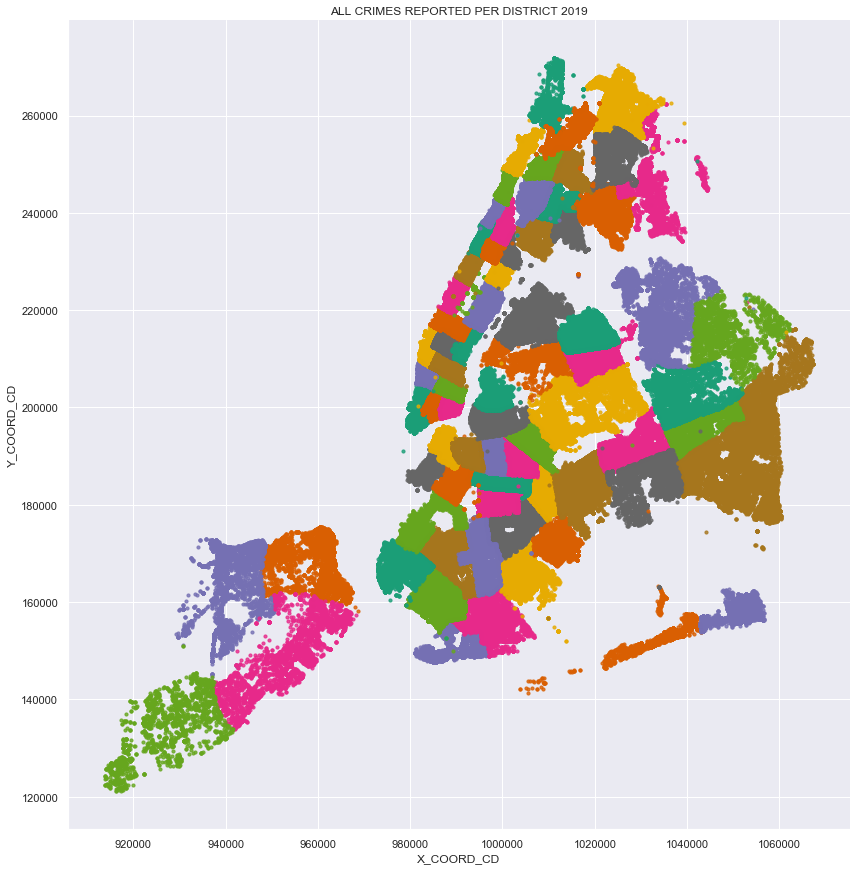

In [15]:
df_coord = df.loc[(df['X_COORD_CD']!=0)]

sns.lmplot('X_COORD_CD',
           'Y_COORD_CD',
           data=df_coord,
           fit_reg=False, 
           hue="DISTRICT", 
           palette='Dark2',
           height=12,
           ci=2,
           legend=False,
           scatter_kws={"marker": "D", 
                        "s": 10}) 
ax = plt.gca()
ax.set_title("ALL CRIMES REPORTED PER DISTRICT 2019")

## Make a map of the most frequent crime in each district

In [16]:
# Implementing first solution from http://stackoverflow.com/questions/45161355/pandas-dataframe-find-the-max-after-groupby-two-columns-and-gaet-counts
# Make a groupby using DISTRICT and OFFENSE_NAME Column. 
# Set `as_index=False` so that the index is int and not the DISTRICT column. 
# `as_index=False` is what separates the groupby into individual rows. Try making it True.
# We want it as individual rows because of how we will use that shape to determine the most frequent crime in each District.
top_crime_in_districts = df.groupby(['DISTRICT', 'OFFENSE_NAME'], as_index=False)['CMPLNT_NUM'].count()
top_crime_in_districts

,DISTRICT,OFFENSE_NAME,CMPLNT_NUM
0,1,ARSON,1
1,1,ASSAULT,541
2,1,BURGLARY,141
3,1,DRIVING_UNDER_INFLUENCE,16
4,1,FORGERY,54
...,...,...,...
1525,123,SEX_CRIMES,21
1526,123,SOCIAL_RELATED_CRIMES,7
1527,123,THEFT,11
1528,123,TRAFFIC_LAWS_VIOLATION,25


In [17]:
# Create a second groupby of the previous groupby.
# This groupby uses only the DISTRICT column. 
# This will create groups for each District 1-123. 
districts = top_crime_in_districts.groupby('DISTRICT')
list(districts)

[(1,     DISTRICT                      OFFENSE_NAME  CMPLNT_NUM
  0          1                             ARSON           1
  1          1                           ASSAULT         541
  2          1                          BURGLARY         141
  3          1           DRIVING_UNDER_INFLUENCE          16
  4          1                           FORGERY          54
  5          1                             FRAUD         173
  6          1                       HARRASSMENT         769
  7          1                          HOMICIDE          70
  8          1                           LARCENY        3316
  9          1                            MURDER           1
  10         1     OFFENSES_AGAINST_PUBLIC_ORDER         947
  11         1  POSSESSION_CONTROLLED_SUBSSTANCE          40
  12         1                 POSSESSION_WEAPON          26
  13         1                           ROBBERY          78
  14         1                        SEX_CRIMES          99
  15         1       

In [18]:
# Using Lambda
# In a groupby you have a bunch of groups. `groupby.apply()` iterates through each group in a groupby and applies some function to it.

# Here, we are going to iterate through each DISTRICT group 
# and find the row in the "OFFENSE_NAME" column where the CMPLNT_NUM is the max 

# So this is like saying 
# result = precincts.apply(lambda group: column[row])
# where `column` is group.OFFENSE_NAME column 
# and `row` is the row index where CMPLNT_NUM is max

result = districts.apply(lambda group: group.OFFENSE_NAME[group.CMPLNT_NUM.idxmax()])

In [19]:
# Print most frequent crime in each precinct
result.to_frame()

,0
DISTRICT,
1,LARCENY
5,LARCENY
6,LARCENY
7,LARCENY
9,LARCENY
...,...
115,LARCENY
120,OFFENSES_AGAINST_PUBLIC_ORDER
121,LARCENY


In [20]:
df.OFFENSE_NAME.value_counts()

LARCENY                             134122
OFFENSES_AGAINST_PUBLIC_ORDER        77147
ASSAULT                              73102
HARRASSMENT                          71154
HOMICIDE                             14059
POSSESSION_CONTROLLED_SUBSSTANCE     13367
ROBBERY                              13325
BURGLARY                             10947
TRAFFIC_LAWS_VIOLATION                8251
SEX_CRIMES                            7535
POSSESSION_WEAPON                     6280
FRAUD                                 6039
FORGERY                               4683
DRIVING_UNDER_INFLUENCE               4366
THEFT                                 3053
SOCIAL_RELATED_CRIMES                 1267
UNCLASSIFIED                           899
ARSON                                  675
MURDER                                 292
GAMBLING                               289
KIDNAPPING                             126
Name: OFFENSE_NAME, dtype: int64

## Plot the frequency of top 10 crimes committed
I want to see the nature of crimes being reported by plotting the top 10 most frequent crime reported.

[Text(0, 0.5, 'Crime'), Text(0.5, 0, 'Number of Crimes')]

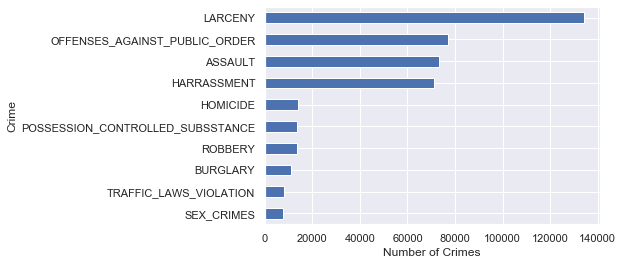

In [21]:
# Get the top 10 crime types with high frequency
top_10_crimes = df.OFFENSE_NAME.value_counts().head(10)

# Sort in descending order
top_10_crimes= top_10_crimes[::-1]

# Plot using horizontal bar chart
ax = top_10_crimes.plot(kind='barh')
ax.set(xlabel= "Number of Crimes", ylabel="Crime")

There is a mix of violent and non violent crimes reported. Larceny, offenses againts public order and Assault are leading. Studies have shown that victims will most likely report a crime if it is violent. The data justifies it.

## Make a bar graph of Felony vs Misdemeanor vs Violation
I would like to see the offense level of crimes reported each month. I used unstacked bar graph to see the trends in each offense level.

Text(0.5, 1.0, 'FELONY VS MISDEMEANOR VS VIOLATION')

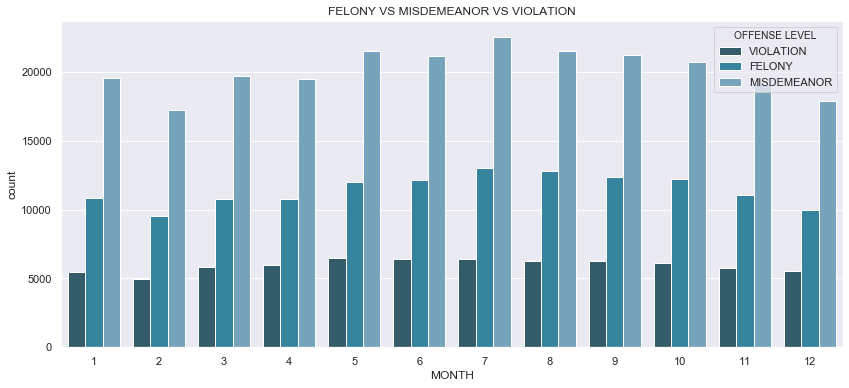

In [22]:
# Plot the offense level occurence in each month
fig, ax = plt.subplots(figsize=(14,6))
crime_lvl = df[['MONTH','OFFENSE LEVEL']]
ax = sns.countplot(x="MONTH",
                   hue='OFFENSE LEVEL',
                   data=crime_lvl,
                   palette="PuBuGn_d")
plt.title('FELONY VS MISDEMEANOR VS VIOLATION')

Looks like Misdemeanor is the top offense category of the crimes in NYC. This is better than having the majority of the crimes be felonies. 

You can see a general trend in the data, where as Misdeameanors increase and decrease, so do Felonies and Violations. This also relates back to the Time-Series plots we made for total crimes reported each month. 

## Make a Stacked Bar Graph of Top 5 Crimes in 2019
I would like to see the distribution of crimes reported each month but due to various of crime being reported, it will be huge data to plot. We can cee this minute scale by plotting only the top 5 most crimes reported each month.

In [23]:
#Filter df only where rows are the top 10 crimes using .loc  
top_10_crimes = df.OFFENSE_NAME.value_counts().head(5).index.tolist()
df2 = df.loc[df['OFFENSE_NAME'].isin(top_10_crimes)]


df2 = df2.groupby(['MONTH', 'OFFENSE_NAME'])['MONTH'].count().unstack()
df2.head()

OFFENSE_NAME,ASSAULT,HARRASSMENT,HOMICIDE,LARCENY,OFFENSES_AGAINST_PUBLIC_ORDER
MONTH,,,,,
1,5355,5433,1107,10138,6692
2,4924,4952,1011,8942,5659
3,5908,5761,1177,9930,6653
4,5919,5952,1180,10281,6339
5,7011,6456,1281,11214,6888


[Text(0, 0.5, 'count'), Text(0.5, 0, 'MONTH')]

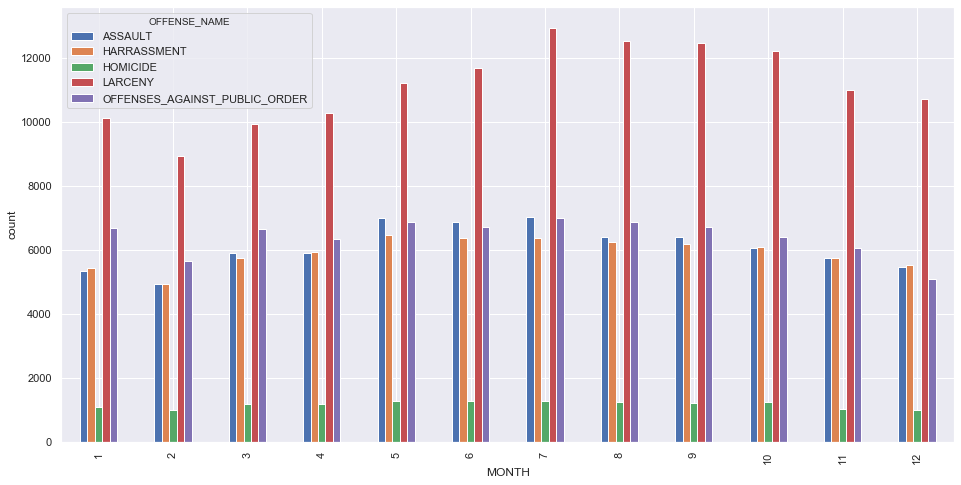

In [24]:
# Plot Stacked Bar Graph
ax = df2.plot(kind='bar',legend="best", figsize=(16,8))
ax.set(xlabel="MONTH", ylabel="count")
# ax.legend(pos="center")

## Conclusion

I used data compiled by the New York police department to extract some insights on crimes reported in New York Metropolitan Area. While the data analysis performed here is devoid of a national perspective my key findings can be distilled to a few key points below:

- Brooklyn has the highest crime reported with 29% of total reports. That makes sense since Brooklyn is the most populated borough according to (https://guides.lib.jjay.cuny.edu/c.php?g=288385&p=1922495).

- The trends of the crime reports in all boroughs are consistent throughout the year. All boroughs have the same months of high and low reports. No overlapping of data trends had occurred.

- Brooklyn as being the one with the highest reports is also consistent to be the highest portion in overall's monthly total in 2019.

- Interestingly, District 75 in Brooklyn as the highest district with most crimes reported followed by District 40, 44 and 52 which are in the Bronx. Manhattan has the second-highest reports overall.

- All districts in NYC have crimes reported.

- Theft and Harrassment were racing with each other throughout the entire month

- The top 10 most crimes reported include larceny, harassment, and assault.

- The most frequent offense level of all crimes reported is a misdemeanor and the general trend of felonies and violations follows it throughout the whole year.

- During hot weather, reports are more frequent compared to the cold season. Reports drop drastically as holidays approached.

While these observations are illuminating, I should mention that they don't paint the whole picture and comparisons should be made with national or other comparable data including crime data from other cities to give more perspective. We don't know if the total crime reports are within the national average or too high. Such comparisons would help us build more compelling arguments in our data storytelling by using them to support our local findings.

With that being said, our findings are still very relevant to the new detectives and residents of NYC for local decision making on how to lessen the crime reports in each borough. 